# Data Processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Let's describe the column names and then load it with the dataset
col_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

In [3]:
#Let's load the dataset
heart=pd.read_csv('heart_disease.csv', names=col_names)

In [4]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


Features Description:
age: age in years

sex: sex (1 = male; 0 = female)

cp: chest pain type -- Value 1: typical angina -- Value 2: atypical angina -- Value 3: non-anginal pain -- Value 4: asymptomatic

trestbps: resting blood pressure (in mm Hg on admission to the hospital)

chol: serum cholestoral in mg/dl

fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg: resting electrocardiographic results -- Value 0: normal -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach: maximum heart rate achieved

exang: exercise induced angina (1 = yes; 0 = no)

oldpeak = ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment -- Value 1: upsloping -- Value 2: flat -- Value 3: downsloping

ca: number of major vessels (0-3) colored by flourosopy

thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

num: diagnosis of heart disease (angiographic disease status) -- Value 0: < 50% diameter narrowing -- Value 1,2,3,4: > 50% diameter narrowing

# Featured Engineering

In [5]:
heart.shape

(200, 14)

In [6]:
#Let's check the value counts in each columns
for i in heart.columns:
    print(heart[i].value_counts())
    print('\n')

63    15
62    15
55    14
60    12
58    12
61    12
57    10
64     9
56     9
69     8
59     8
54     7
51     7
65     6
74     5
67     5
53     5
68     4
48     4
72     3
66     3
75     3
40     2
46     2
50     2
49     2
41     2
52     2
71     2
42     1
37     1
38     1
77     1
43     1
44     1
45     1
76     1
70     1
35     1
Name: age, dtype: int64


1    194
0      6
Name: sex, dtype: int64


4    131
3     47
2     14
1      8
Name: cp, dtype: int64


?      56
120    16
130    15
140    10
110     9
150     9
160     8
122     6
142     5
144     4
134     4
128     4
126     4
124     4
136     4
170     4
132     3
158     3
104     2
112     2
138     2
116     2
180     2
155     2
154     2
152     2
125     2
114     1
156     1
146     1
118     1
172     1
102     1
190     1
127     1
135     1
96      1
178     1
100     1
0       1
106     1
Name: trestbps, dtype: int64


0      49
?       7
258     4
220     4
203     4
       ..
241     1
142    

From the above out put we can clearly observe that [ "trestbps, chol, fbs, thalach, exang, oldpeak, slope, ca, thal" ] these columns have "?" values. These are null values thus we need to replace these values.

# Data Cleaning

In [7]:
#Let's convert the "?" value to nan value
heart.replace({'?':np.nan},inplace=True)

In [8]:
#Let's convert the nan value with its median values in all the missing columns
heart['trestbps'].replace({np.nan: heart['trestbps'].median()},inplace=True)

heart['chol'].replace({np.nan: heart['chol'].median()},inplace=True)

heart['fbs'].replace({np.nan: heart['fbs'].median()},inplace=True)

heart['thalach'].replace({np.nan: heart['thalach'].median()},inplace=True)

heart['exang'].replace({np.nan: heart['exang'].median()},inplace=True)

heart['oldpeak'].replace({np.nan: heart['oldpeak'].median()},inplace=True)

heart['slope'].replace({np.nan: heart['slope'].median()},inplace=True)

heart['ca'].replace({np.nan: heart['ca'].median()},inplace=True)

heart['thal'].replace({np.nan: heart['thal'].median()},inplace=True)

In [9]:
#Let's fill the cholestrol null value with the median value
heart['chol'].replace({0: heart['chol'].median()},inplace=True)

In [10]:
#Let's change the columns Dtypes 'object' to 'float64'
heart[['trestbps', 'chol', 'thalach', 'oldpeak']]=heart[['trestbps', 'chol', 'thalach', 'oldpeak']].astype('float64')

In [11]:
#Let's change the columns Dtypes 'object' to 'int64'
heart[['exang','fbs','slope', 'ca', 'thal']]=heart[['exang', 'fbs', 'slope', 'ca', 'thal']].astype('int64')

In [12]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140.0,260.0,0,1,112.0,1,3.0,2,0,7,2
1,44,1,4,130.0,209.0,0,1,127.0,0,0.0,2,0,7,0
2,60,1,4,132.0,218.0,0,1,140.0,1,1.5,3,0,7,2
3,55,1,4,142.0,228.0,0,1,149.0,1,2.5,1,0,7,1
4,66,1,3,110.0,213.0,1,2,99.0,1,1.3,2,0,7,0


# Exploratory Data Analysis

In [13]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       200 non-null    int64  
 1   sex       200 non-null    int64  
 2   cp        200 non-null    int64  
 3   trestbps  200 non-null    float64
 4   chol      200 non-null    float64
 5   fbs       200 non-null    int64  
 6   restecg   200 non-null    int64  
 7   thalach   200 non-null    float64
 8   exang     200 non-null    int64  
 9   oldpeak   200 non-null    float64
 10  slope     200 non-null    int64  
 11  ca        200 non-null    int64  
 12  thal      200 non-null    int64  
 13  num       200 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 22.0 KB


In [14]:
#Let's check the shape of our cleaned data set
heart.shape


(200, 14)

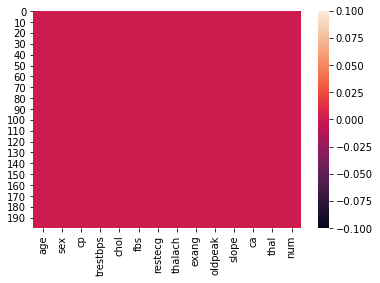

In [15]:
#Let's plot the heat map for null values

sns.heatmap(heart.isnull())
plt.show()

We can clearly say that our dataset has no null values

In [16]:
#Let's check the statistic matrix
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.0,200.000000,200.000000
mean,59.350000,0.970000,3.505000,132.710000,232.970000,0.340000,0.735000,122.055000,0.740000,1.371000,2.065000,0.0,6.880000,1.520000
std,7.811697,0.171015,0.795701,18.335947,45.989392,0.474898,0.683455,18.876269,0.439735,0.941216,0.471046,0.0,0.589353,1.219441
min,35.000000,0.000000,1.000000,0.000000,100.000000,0.000000,0.000000,69.000000,0.000000,-0.500000,1.000000,0.0,3.000000,0.000000
25%,55.000000,1.000000,3.000000,125.750000,216.000000,0.000000,0.000000,112.000000,0.000000,1.000000,2.000000,0.0,7.000000,0.000000
50%,60.000000,1.000000,4.000000,130.000000,216.000000,0.000000,1.000000,120.000000,1.000000,1.500000,2.000000,0.0,7.000000,1.000000
75%,64.000000,1.000000,4.000000,140.000000,254.500000,1.000000,1.000000,130.000000,1.000000,2.000000,2.000000,0.0,7.000000,3.000000
max,77.000000,1.000000,4.000000,190.000000,458.000000,1.000000,2.000000,180.000000,1.000000,4.000000,3.000000,0.0,7.000000,4.000000


Observations:
1- Standard Deviation is maxium for the cholestrol ('chol')

2- Minimum age is 35 and maximum age is 77

3- Resting Blood Pressure ('trestbps') 50% is 130,
   75% is 140 and 100% is 190 which clearly indicates
   that there are outliers in this column

4- Similarly for cholestrol ('chol') there is a huge
   difference between 75% and 100% which clearly indicates
   that we have outliers present in this column also.

5- Count of all the columns confirm our above analysis
   that there are no null values.

6- We can observe that all the values in number of major
   vessels 'ca' is 0, so we can drop this column because
   it will have no contribution in our analysis 

7- We can also observe that in the data set we have only
   male patinent details and we do not have and details
   about female patients.

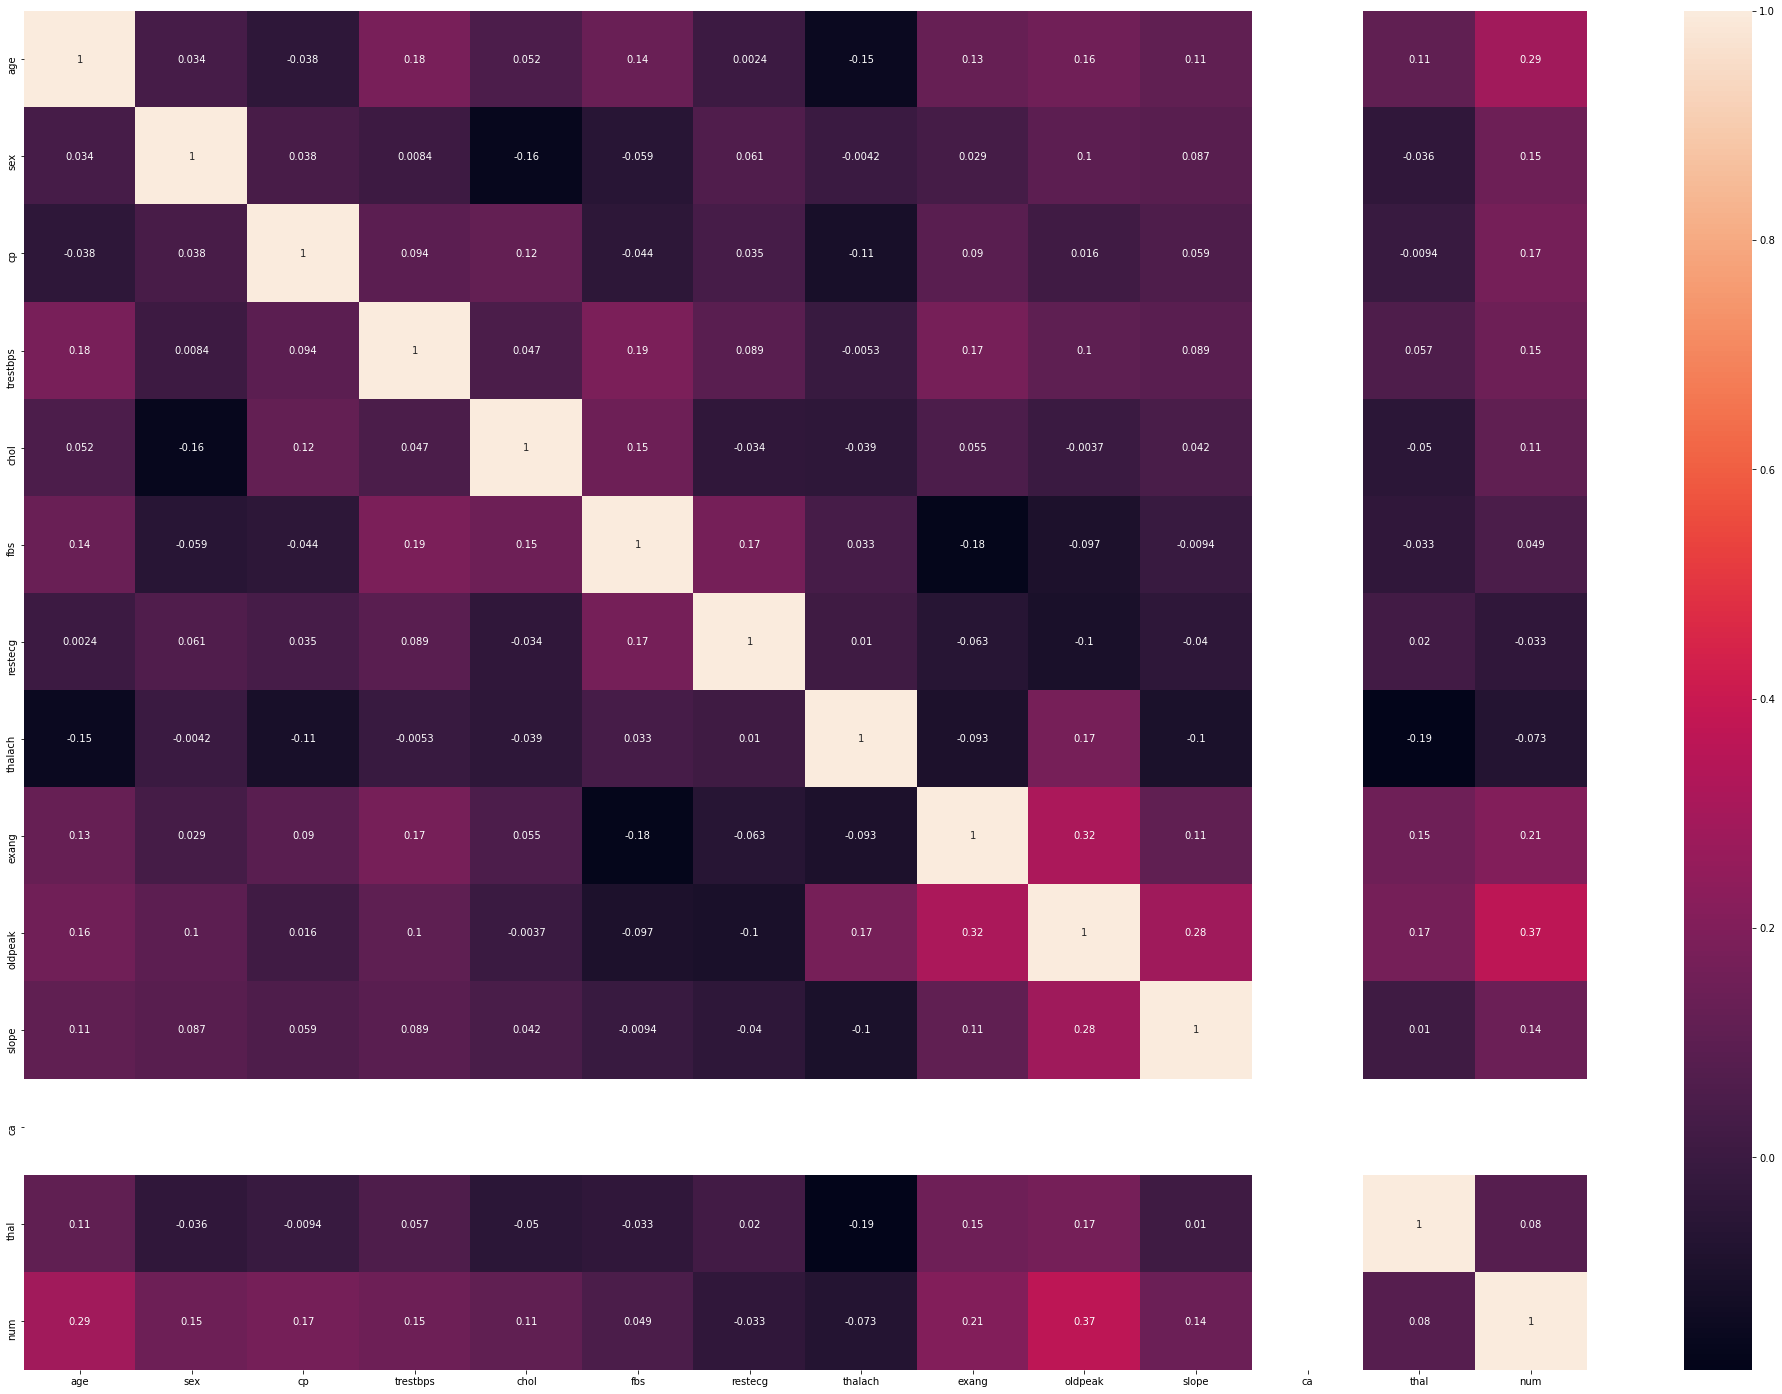

In [17]:
#Let's plot the heat map for correlation
plt.figure(figsize=(35,25))
#sns.set(font_scale=3.5)
#plt.rcParams.update({'font.size': 38})
sns.heatmap(heart.corr(),annot=True)

# Data Visualization

In [18]:
#Let's analyse the Heart disease target variable with other features

#Relation ship between heart disease variable and age
print("Minimum age to Maximum age as per heart disease")
heart.groupby(["num", ])["age"].min().astype(str) + ', ' +  heart.groupby(["num", ])["age"].max().astype(str)


Minimum age to Maximum age as per heart disease


num
0    35, 75
1    38, 75
2    46, 74
3    48, 77
4    56, 76
Name: age, dtype: object

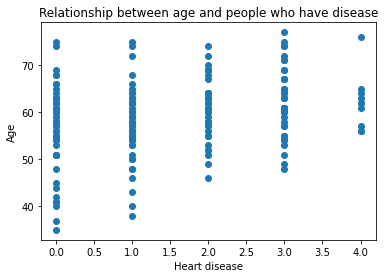

In [19]:
plt.xlabel("Heart disease")
plt.ylabel("Age")
plt.title("Relationship between age and people who have disease")
plt.scatter(heart['num'], heart['age'])
plt.show()

Observations:
1- People who do not have heart disease their
   range is min(40) and max(75)

2- People who have heart disease and catagorised
   in range of 1 to 4 are:

        type 1 - min(38) and max(75)
        type 2 - min(51) and max(74)
        type 3 - min(48) and max(77)
        type 4 - min(56) and max(76)

In [20]:
print ("Relationship between heart disease, age and chest pain ")
heart.groupby(["num", "cp"])["age"].count()

Relationship between heart disease, age and chest pain 


num  cp
0    1      3
     2      9
     3     16
     4     23
1    1      1
     2      4
     3      9
     4     42
2    1      1
     2      1
     3      8
     4     31
3    1      3
     3     11
     4     28
4    3      3
     4      7
Name: age, dtype: int64

In [21]:
print("Mean Chest Pain as per disease type")
heart.groupby(["num", ])["cp"].mean()

Mean Chest Pain as per disease type


num
0    3.156863
1    3.642857
2    3.682927
3    3.523810
4    3.700000
Name: cp, dtype: float64

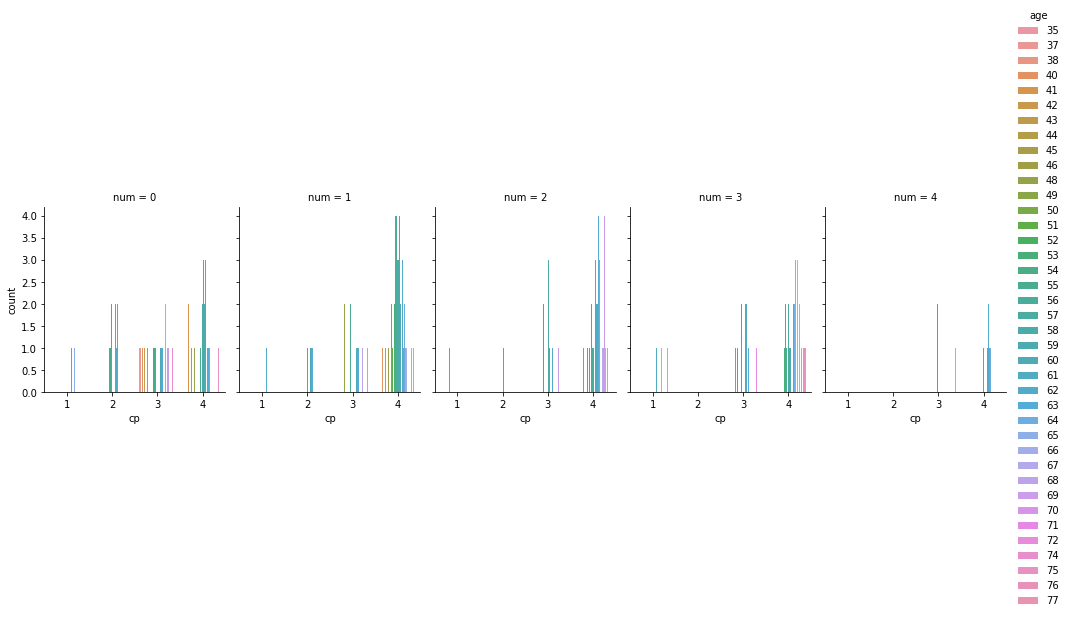

In [22]:
g = sns.catplot(x="cp", hue="age", col="num", data=heart, kind="count",height=3.5, aspect=0.8)

We can observe that those who have type 4 'Asymptomatic' chest pain often have heart disease when compared with the other types of chect pain

In [23]:
print ("Minimum Blood Pressure to Maximum  Blood Pressure as per heart disease")

heart.groupby(["num"])["trestbps"].min().astype(str) + ', ' +  heart.groupby(["num"])["trestbps"].max().astype(str)

Minimum Blood Pressure to Maximum  Blood Pressure as per heart disease


num
0    100.0, 180.0
1     96.0, 180.0
2    110.0, 170.0
3      0.0, 172.0
4    104.0, 190.0
Name: trestbps, dtype: object

In [24]:
print("Mean Blood Pressure as per disease type")
heart.groupby(["num", ])["trestbps"].mean()


Mean Blood Pressure as per disease type


num
0    129.941176
1    130.928571
2    135.219512
3    132.976190
4    145.400000
Name: trestbps, dtype: float64

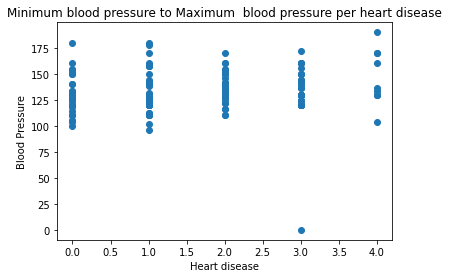

In [25]:
plt.xlabel("Heart disease")
plt.ylabel("Blood Pressure")
plt.title("Minimum blood pressure to Maximum  blood pressure per heart disease")
plt.scatter(heart['num'], heart['trestbps'])
plt.show()


Observations:
1- People who do not have heart disease their
   their blood pressure range is min(100)
    and max(180)

2- People who have heart disease and catagorised
   in range of 1 to 4 are:

        type 1 - min(90) and max(180)
        type 2 - min(110) and max(170)
        type 3 - min(0) and max(172)
        type 4 - min(104) and max(190)

3- We can also observe that type have some outlier

In [26]:
print ("Minimum cholestoral to Maximum cholestoral per heart disease")

heart.groupby(["num"])["chol"].min().astype(str) + ', ' +  heart.groupby(["num"])["chol"].max().astype(str)

Minimum cholestoral to Maximum cholestoral per heart disease


num
0    139.0, 458.0
1    100.0, 349.0
2    153.0, 384.0
3    142.0, 369.0
4    170.0, 287.0
Name: chol, dtype: object

In [27]:
print("Mean Cholestoral as per disease type")
heart.groupby(["num", ])["chol"].mean()

Mean Cholestoral as per disease type


num
0    226.705882
1    231.125000
2    232.073171
3    244.000000
4    232.600000
Name: chol, dtype: float64

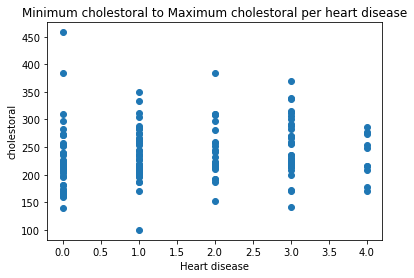

In [28]:
plt.xlabel("Heart disease")
plt.ylabel("cholestoral")
plt.title("Minimum cholestoral to Maximum cholestoral per heart disease")
plt.scatter(heart['num'], heart['chol'])
plt.show()

In [29]:
print ("Minimum Heart Rate to Maximum Heart Rate per heart disease")

heart.groupby(["num"])["thalach"].min().astype(str) + ', ' +  heart.groupby(["num"])["thalach"].max().astype(str)

Minimum Heart Rate to Maximum Heart Rate per heart disease


num
0    69.0, 180.0
1    93.0, 165.0
2    84.0, 180.0
3    73.0, 160.0
4    84.0, 150.0
Name: thalach, dtype: object

In [30]:
print("Mean HEart Rate as per disease type")
heart.groupby(["num", ])["thalach"].mean()

Mean HEart Rate as per disease type


num
0    123.098039
1    123.017857
2    122.878049
3    119.500000
4    118.700000
Name: thalach, dtype: float64

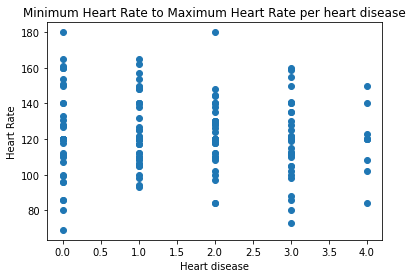

In [31]:
plt.xlabel("Heart disease")
plt.ylabel("Heart Rate")
plt.title("Minimum Heart Rate to Maximum Heart Rate per heart disease")
plt.scatter(heart['num'], heart['thalach'])
plt.show()

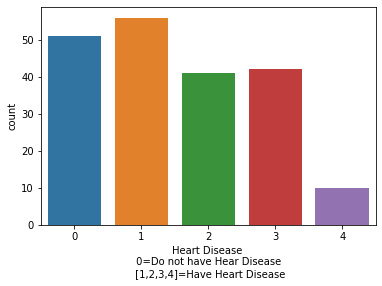

In [32]:
sns.countplot(x='num',data=heart)
plt.xlabel("Heart Disease \n 0=Do not have Hear Disease \n [1,2,3,4]=Have Heart Disease")
plt.show()

Observation:
1- We have around 52 number of patients who does not have
   heart disease and and rest all have heart disease
   symptoms.

2- Patient who have heart disease are further categories
   into 4 types in which 1 type has more number of patient,
   then we have type 3 and followed by type 2 and 4.

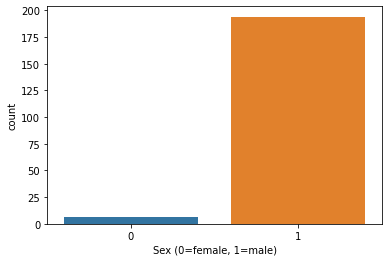

In [33]:
sns.countplot(x='sex',data=heart)
plt.xlabel("Sex (0=female, 1=male)")
plt.show()

From the above graph we can cleary observe that female patient '0' are extremply less as compared to male patients in our dataset

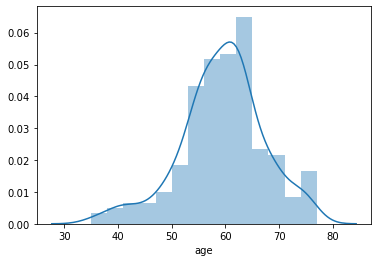

In [34]:
sns.distplot(heart['age'])

We can observe that majority of the patients are mid age patient and their age range varies from 50 to 70 years of age

Text(0.5, 1.0, 'Age of patients who do not have heart disease')

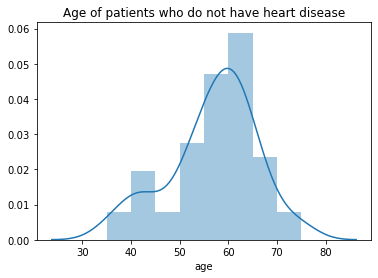

In [35]:
sns.distplot(heart[heart['num']==0].age)
plt.title("Age of patients who do not have heart disease")

Text(0.5, 1.0, 'Age of patients who have heart disease')

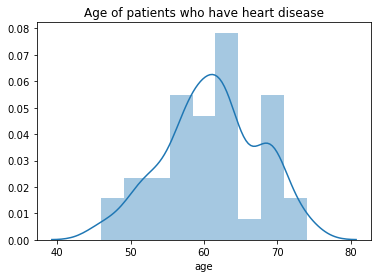

In [36]:
sns.distplot(heart[heart['num']==2].age)
plt.title("Age of patients who have heart disease")

We can observe from the above two plots that age distribution of health people is much wider as compare to the people who have heart disease. Those who are in their 50 and above have much more greater risk of having heart disease.

Text(0.5, 1.0, 'Max heart rate of patients who do not have heart disease')

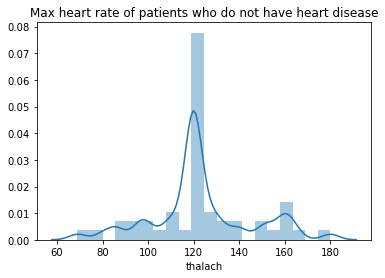

In [37]:
sns.distplot(heart[heart['num']==0].thalach)
plt.title("Max heart rate of patients who do not have heart disease")

We can observe that the the patient who do not have heart disease have maximum heart rate from range of 110-130

Text(0.5, 1.0, 'Max heart rate of patients who have heart disease')

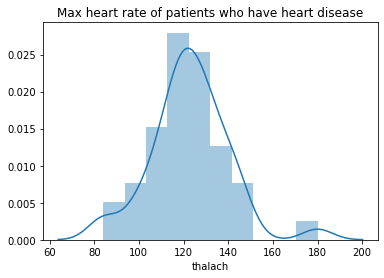

In [38]:
sns.distplot(heart[heart['num']==2].thalach)
plt.title("Max heart rate of patients who have heart disease")

We can observe that the the patient who heart rate more than 130 have more chances of having heart disease

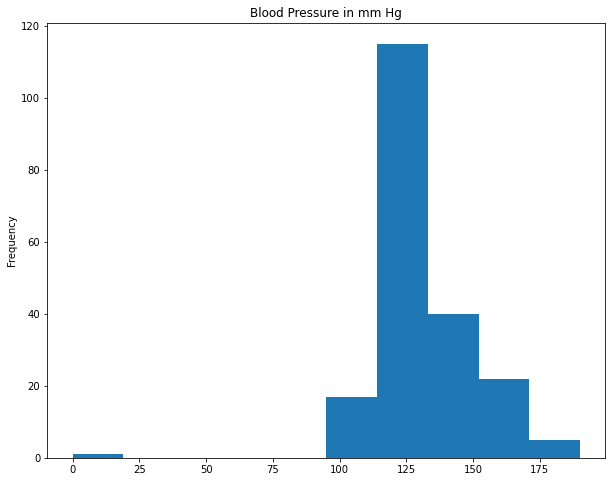

In [39]:
heart['trestbps'].plot(kind='hist',title='Blood Pressure in mm Hg',figsize=(10,8))
plt.show()

We can observe that the maximum Blood Pressure ranges from 120 to 130 mm Hg

Text(0.5, 1.0, 'Max Blood Pressure of patients who do not have heart disease')

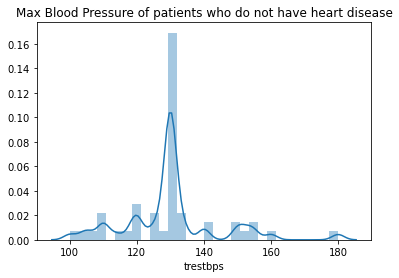

In [40]:
sns.distplot(heart[heart['num']==0].trestbps)
plt.title("Max Blood Pressure of patients who do not have heart disease")

We can observe that the pationet who do not have heart disease thier maximum Blood Pressure ranges from 125 to 130 mm Hg

Text(0.5, 1.0, 'Max Blood Pressure of patients who have heart disease')

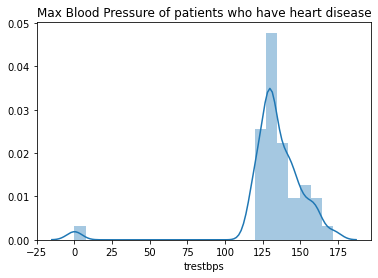

In [41]:
sns.distplot(heart[heart['num']==3].trestbps)
plt.title("Max Blood Pressure of patients who have heart disease")

We can observe that the pationet who have heart disease thier maximum Blood Pressure ranges from 125 to 160 mm Hg

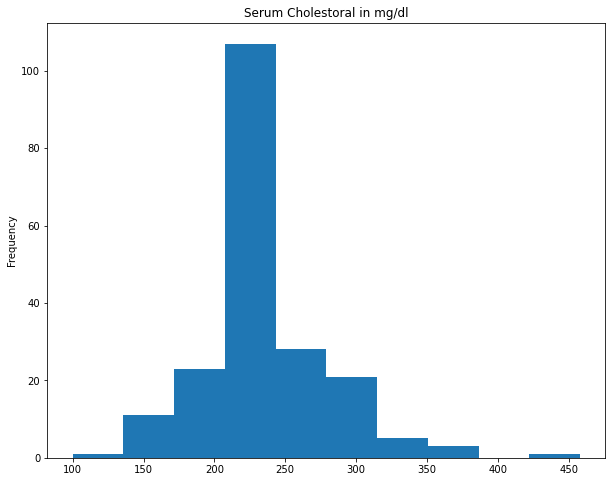

In [42]:
heart['chol'].plot(kind='hist',title='Serum Cholestoral in mg/dl',figsize=(10,8))
plt.show()

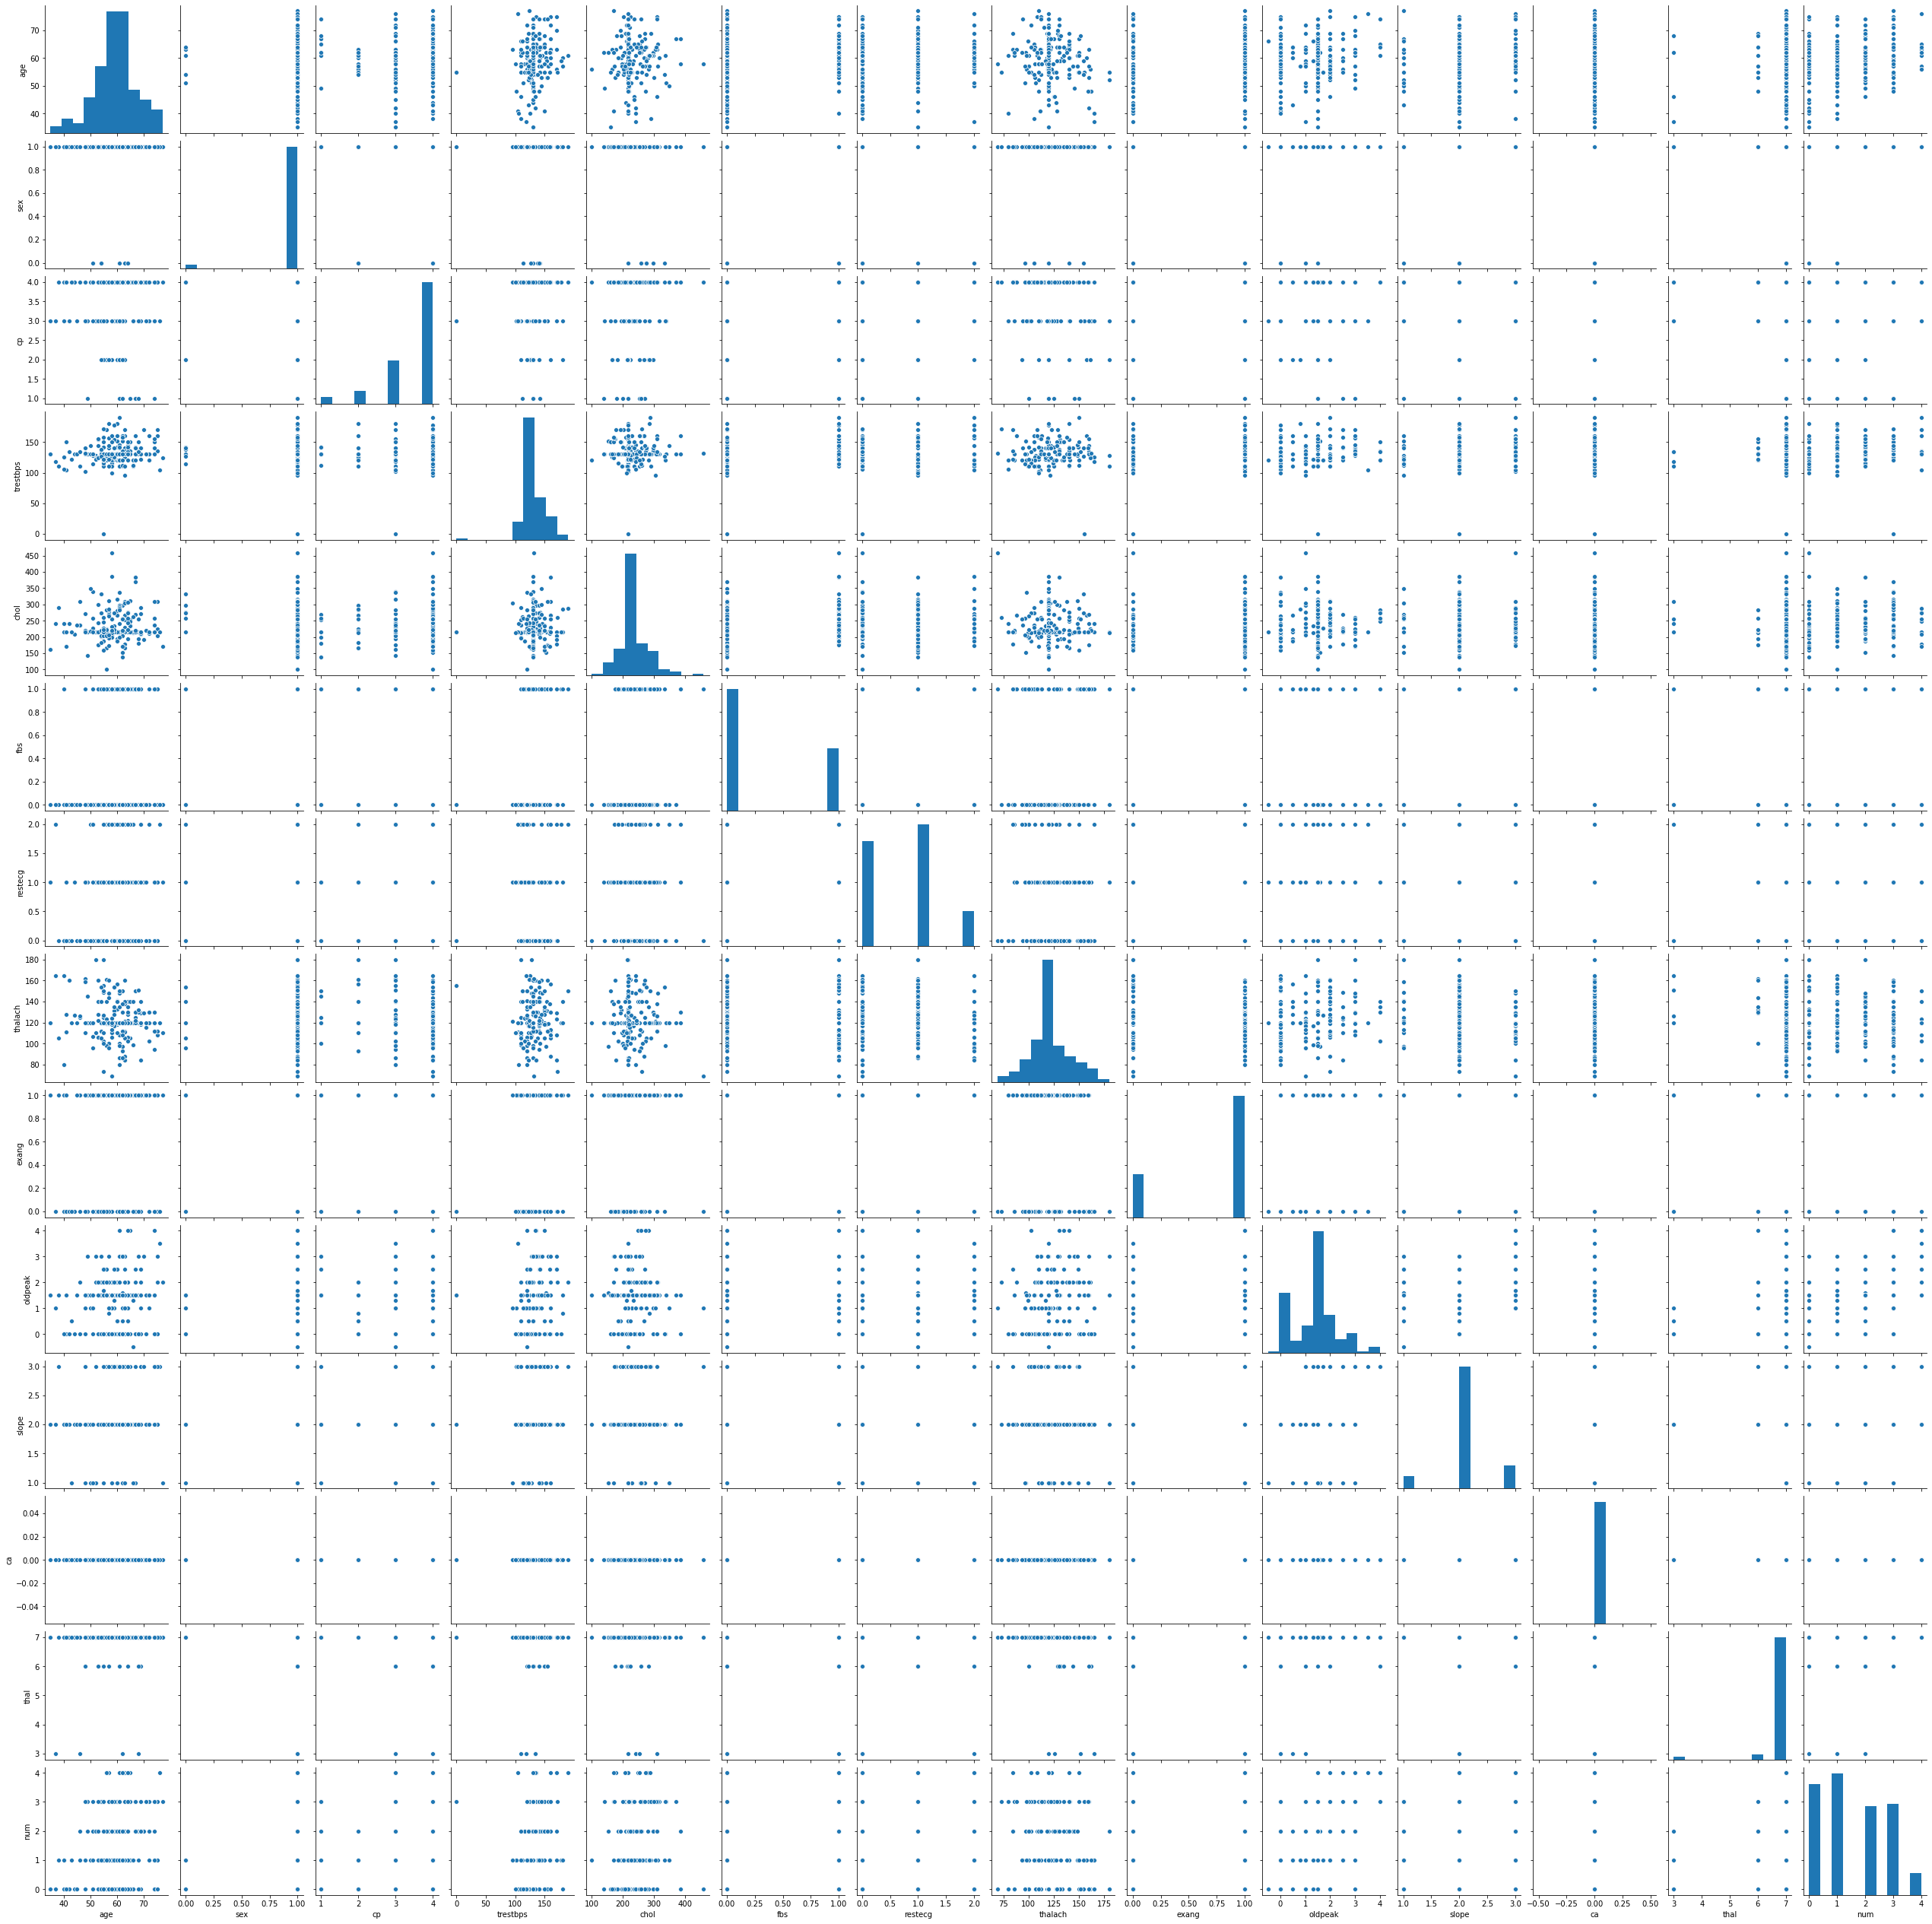

In [43]:
# Let's plot the pair plot
sns.pairplot(heart)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000278179F76A0>,
      dtype=object)

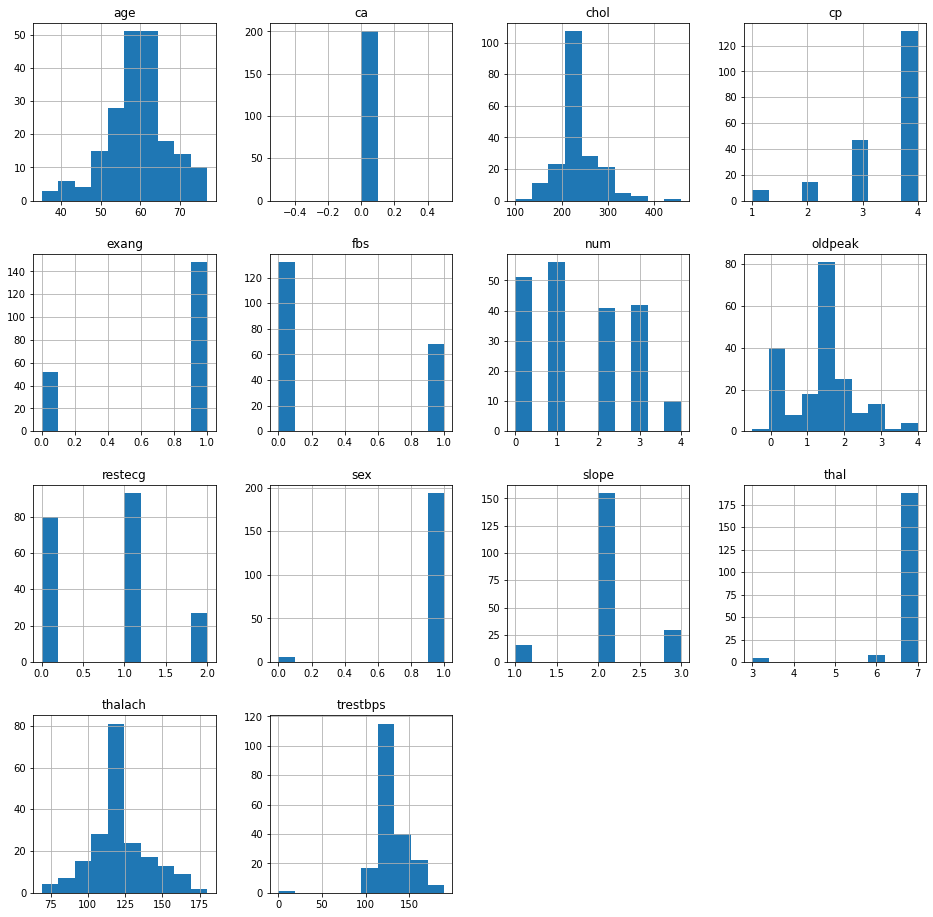

In [44]:
#Let's plot the histogram
heart.hist(figsize=(16,16))

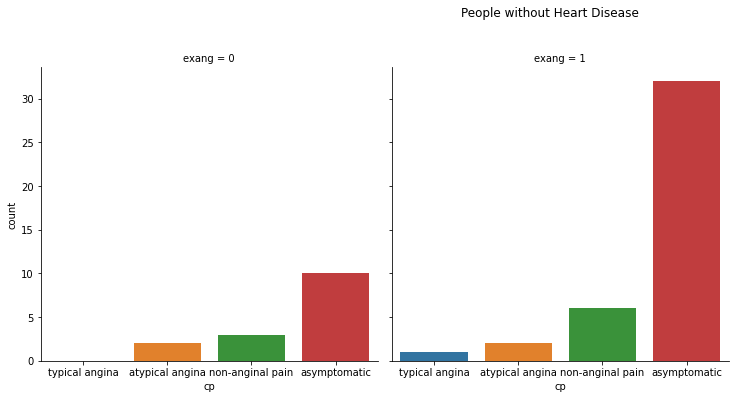

In [45]:
g = sns.factorplot("cp", col = "exang", col_wrap = 3, data = heart[heart['num'] == 1], kind = "count")
plt.xticks(np.arange(4), ('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'), rotation = 0)
g.fig.suptitle('People without Heart Disease', y =1.1)

plt.show()

We can cleacrly observe that the exercise induces angina is most common for type 4 asymptomatic chest pain

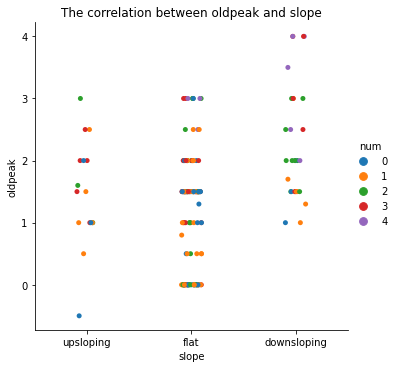

In [46]:
sns.catplot(x = "slope", y = "oldpeak", hue = "num", data = heart)
plt.title('The correlation between oldpeak and slope')
plt.xticks(np.arange(3), ('upsloping', 'flat', 'downsloping'), rotation = 0)
plt.show()

We can observe that downslloping 'slope' have higher value of ST Depression 'oldpeak'

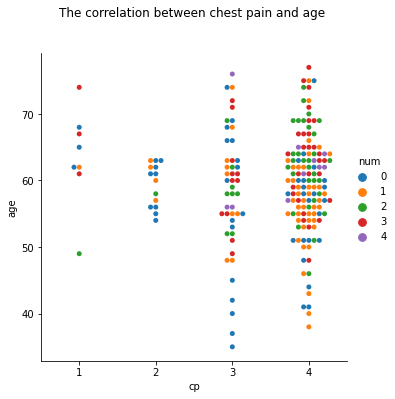

In [47]:
g = sns.catplot(x = 'cp', y = 'age', hue = 'num', data = heart, kind="swarm")
g.fig.suptitle('The correlation between chest pain and age', y = 1.1)
plt.show()

We can observe that 50 to 70 age of people with chest pain have higer risk of having heart disease

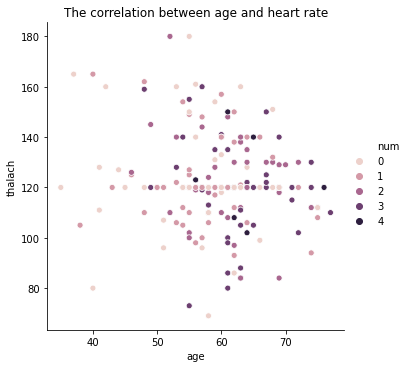

In [48]:
sns.relplot(x = 'age', y = 'thalach', data = heart, hue = 'num', legend="full")
plt.title('The correlation between age and heart rate')
plt.show()

We can observe that with increment in age the chances of getting heart disease will also increase.

# Plotting Outliers

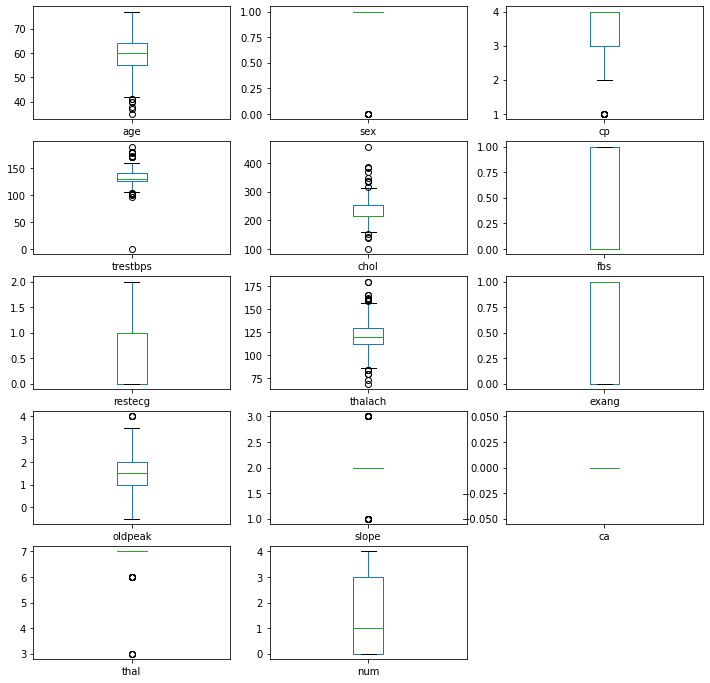

In [49]:
heart.plot(kind='box',subplots=True,layout=(5,3),figsize=(12,12))
plt.show()


In [50]:
collist=heart.columns.values
ncol=20
nrow=13

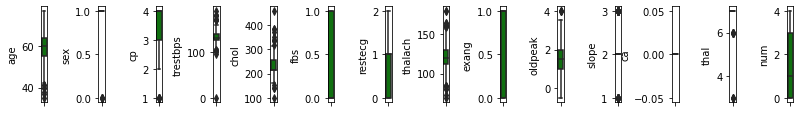

In [51]:
plt.figure(figsize=(16,20))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(heart[collist[i]],color='green',orient='v')
    plt.tight_layout()


In [52]:
#Let's check for skewness
heart.skew()

age        -0.404091
sex        -5.552105
cp         -1.648734
trestbps   -1.320144
chol        1.254662
fbs         0.680636
restecg     0.391463
thalach     0.265689
exang      -1.102593
oldpeak     0.259052
slope       0.210521
ca          0.000000
thal       -5.920627
num         0.297393
dtype: float64

In [53]:
# Let's treat the skewness
for col in heart.columns:
    if heart[col].skew()>0.55:
        heart[col]=np.log1p(heart[col])

In [54]:
heart.skew()

age        -0.404091
sex        -5.552105
cp         -1.648734
trestbps   -1.320144
chol        0.138804
fbs         0.680636
restecg     0.391463
thalach     0.265689
exang      -1.102593
oldpeak     0.259052
slope       0.210521
ca          0.000000
thal       -5.920627
num         0.297393
dtype: float64

# Model Prepration

In [55]:
# if "Num" == 0, people do not have heart disease -  '0'
# if "Num" >= 1, peopel have heart disease- we can impute 1
heart.loc[:, "heart disease"] = heart.loc[:, "num"].apply(lambda x: 1 if x >= 1 else 0)

In [56]:
heart.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,heart disease
0,63,1,4,140.0,5.564520,0.000000,1,112.0,1,3.0,2,0,7,2,1
1,44,1,4,130.0,5.347108,0.000000,1,127.0,0,0.0,2,0,7,0,0
2,60,1,4,132.0,5.389072,0.000000,1,140.0,1,1.5,3,0,7,2,1
3,55,1,4,142.0,5.433722,0.000000,1,149.0,1,2.5,1,0,7,1,1
4,66,1,3,110.0,5.365976,0.693147,2,99.0,1,1.3,2,0,7,0,0


In [57]:
heart.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,heart disease
195,54,0,4,127.0,5.811141,0.693147,1,154.0,0,0.0,2,0,7,1,1
196,62,1,1,130.0,4.941642,0.000000,1,120.0,1,1.5,2,0,7,0,0
197,55,1,4,122.0,5.411646,0.693147,1,100.0,0,0.0,2,0,6,2,1
198,58,1,4,130.0,5.955837,0.693147,2,120.0,1,1.5,2,0,7,0,0
199,62,1,2,120.0,5.541264,0.000000,2,93.0,1,0.0,2,0,7,1,1


In [58]:
heart.shape

(200, 15)

In [59]:
#Let's split the data into 'x' independent and 'y' dependent variables
x = heart.drop(['heart disease','num'],axis=1)
y = heart['heart disease']

In [60]:
#First let's scale our model
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x)
x_train=pd.DataFrame(x_train,columns=x.columns)

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [62]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
def cal_accuracy(y_test, y_predict): 
    
    print("\nConfusion Matrix: \n", 
    confusion_matrix(y_test, y_predict)) 
    
    print("\nClassification Report: \n", 
    classification_report(y_test, y_predict)) 
      
    print (f"\nAccuracy : {accuracy_score(y_test,y_predict)*100:0.2f}%")

In [63]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x_train,y_train)
print(f"Accuracy of Train Dataset: {log.score(x_train,y_train)*100:0.2f}%")
print(f"Accuracy of Test Dataset: {log.score(x_test,y_test)*100:0.2f}%")

Accuracy of Train Dataset: 77.50%
Accuracy of Test Dataset: 62.50%


In [64]:
y_predict=log.predict(x_test)
print("Predicted values:") 
print(y_predict)
cal_accuracy(y_test, y_predict)

Predicted values:
[1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]

Confusion Matrix: 
 [[ 2 12]
 [ 3 23]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.40      0.14      0.21        14
           1       0.66      0.88      0.75        26

    accuracy                           0.62        40
   macro avg       0.53      0.51      0.48        40
weighted avg       0.57      0.62      0.56        40


Accuracy : 62.50%


In [65]:
from sklearn import svm
svm_linear = svm.SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
print(f"Accuracy of Train Dataset: {svm_linear.score(x_train,y_train)*100:0.2f}%")
print(f"Accuracy of Test Dataset: {svm_linear.score(x_test,y_test)*100:0.2f}%")

Accuracy of Train Dataset: 80.00%
Accuracy of Test Dataset: 62.50%


In [66]:
y_predict=svm_linear.predict(x_test)
print("Predicted values:") 
print(y_predict)
cal_accuracy(y_test, y_predict)

Predicted values:
[1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]

Confusion Matrix: 
 [[ 2 12]
 [ 3 23]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.40      0.14      0.21        14
           1       0.66      0.88      0.75        26

    accuracy                           0.62        40
   macro avg       0.53      0.51      0.48        40
weighted avg       0.57      0.62      0.56        40


Accuracy : 62.50%


In [67]:
from sklearn import svm
svm_rbf = svm.SVC(kernel='rbf')
svm_rbf.fit(x_train,y_train)
print(f"Accuracy of Train Dataset: {svm_rbf.score(x_train,y_train)*100:0.2f}%")
print(f"Accuracy of Test Dataset: {svm_rbf.score(x_test,y_test)*100:0.2f}%")

Accuracy of Train Dataset: 76.88%
Accuracy of Test Dataset: 65.00%


In [68]:
y_predict=svm_rbf.predict(x_test)
print("Predicted values:") 
print(y_predict)
cal_accuracy(y_test, y_predict)

Predicted values:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]

Confusion Matrix: 
 [[ 0 14]
 [ 0 26]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.65      1.00      0.79        26

    accuracy                           0.65        40
   macro avg       0.33      0.50      0.39        40
weighted avg       0.42      0.65      0.51        40


Accuracy : 65.00%


In [69]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = "gini", random_state =100,max_depth=3, min_samples_leaf=5)
tree.fit(x_train, y_train)
print(f"Accuracy of Train Dataset: {tree.score(x_train,y_train)*100:0.2f}%")
print(f"Accuracy of Test Dataset: {tree.score(x_test,y_test)*100:0.2f}%")

Accuracy of Train Dataset: 83.12%
Accuracy of Test Dataset: 65.00%


In [70]:
y_predict=tree.predict(x_test)
print("Predicted values:") 
print(y_predict)
cal_accuracy(y_test, y_predict)

Predicted values:
[1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1]

Confusion Matrix: 
 [[ 2 12]
 [ 2 24]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.50      0.14      0.22        14
           1       0.67      0.92      0.77        26

    accuracy                           0.65        40
   macro avg       0.58      0.53      0.50        40
weighted avg       0.61      0.65      0.58        40


Accuracy : 65.00%


In [71]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=100)
forest.fit(x_train,y_train)
print(f"Accuracy of Train Dataset: {forest.score(x_train,y_train)*100:0.2f}%")
print(f"Accuracy of Test Dataset: {forest.score(x_test,y_test)*100:0.2f}%")

Accuracy of Train Dataset: 100.00%
Accuracy of Test Dataset: 65.00%


In [72]:
y_predict=forest.predict(x_test)
print("Predicted values:\n")
print(y_predict)
cal_accuracy(y_test, y_predict)

Predicted values:

[1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1]

Confusion Matrix: 
 [[ 2 12]
 [ 2 24]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.50      0.14      0.22        14
           1       0.67      0.92      0.77        26

    accuracy                           0.65        40
   macro avg       0.58      0.53      0.50        40
weighted avg       0.61      0.65      0.58        40


Accuracy : 65.00%


In [73]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(n_estimators=100)
gbc.fit(x_train,y_train)
print(f"Accuracy of Train Dataset: {gbc.score(x_train,y_train)*100:0.2f}%")
print(f"Accuracy of Test Dataset: {gbc.score(x_test,y_test)*100:0.2f}%")

Accuracy of Train Dataset: 97.50%
Accuracy of Test Dataset: 72.50%


In [74]:
y_predict=gbc.predict(x_test)
print("Predicted values:\n")
print(y_predict)
cal_accuracy(y_test, y_predict)

Predicted values:

[1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 1]

Confusion Matrix: 
 [[ 5  9]
 [ 2 24]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.36      0.48        14
           1       0.73      0.92      0.81        26

    accuracy                           0.73        40
   macro avg       0.72      0.64      0.64        40
weighted avg       0.72      0.72      0.70        40


Accuracy : 72.50%


In [75]:
from sklearn.ensemble import ExtraTreesClassifier
tree_ex=ExtraTreesClassifier(criterion = "entropy", random_state =100,max_depth=3, min_samples_leaf=5)
tree_ex.fit(x_train,y_train)
print(f"Accuracy of Train Dataset: {tree_ex.score(x_train,y_train)*100:0.2f}%")
print(f"Accuracy of Test Dataset: {tree_ex.score(x_test,y_test)*100:0.2f}%")

Accuracy of Train Dataset: 76.88%
Accuracy of Test Dataset: 65.00%


In [76]:
y_predict=tree_ex.predict(x_test)
print("Predicted values:\n")
print(y_predict)
cal_accuracy(y_test, y_predict)

Predicted values:

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]

Confusion Matrix: 
 [[ 0 14]
 [ 0 26]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.65      1.00      0.79        26

    accuracy                           0.65        40
   macro avg       0.33      0.50      0.39        40
weighted avg       0.42      0.65      0.51        40


Accuracy : 65.00%


In [77]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
print(f"Accuracy of Train Dataset: {knn.score(x_train,y_train)*100:0.2f}%")
print(f"Accuracy of Test Dataset: {knn.score(x_test,y_test)*100:0.2f}%")

Accuracy of Train Dataset: 80.62%
Accuracy of Test Dataset: 65.00%


In [78]:
y_predict=knn.predict(x_test)
print("Predicted values:\n")
print(y_predict)
cal_accuracy(y_test, y_predict)


Predicted values:

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]

Confusion Matrix: 
 [[ 0 14]
 [ 0 26]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.65      1.00      0.79        26

    accuracy                           0.65        40
   macro avg       0.33      0.50      0.39        40
weighted avg       0.42      0.65      0.51        40


Accuracy : 65.00%


In [79]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
print(f"Accuracy of Train Dataset: {gnb.score(x_train,y_train)*100:0.2f}%")
print(f"Accuracy of Test Dataset: {gnb.score(x_test,y_test)*100:0.2f}%")

Accuracy of Train Dataset: 81.25%
Accuracy of Test Dataset: 62.50%


In [80]:
y_predict=gnb.predict(x_test)
print("Predicted values:\n")
print(y_predict)
cal_accuracy(y_test, y_predict)

Predicted values:

[1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1]

Confusion Matrix: 
 [[ 3 11]
 [ 4 22]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.43      0.21      0.29        14
           1       0.67      0.85      0.75        26

    accuracy                           0.62        40
   macro avg       0.55      0.53      0.52        40
weighted avg       0.58      0.62      0.58        40


Accuracy : 62.50%


In [81]:
from sklearn.ensemble import AdaBoostClassifier
adb=AdaBoostClassifier()
adb.fit(x_train,y_train)
print(f"Accuracy of Train Dataset: {adb.score(x_train,y_train)*100:0.2f}%")
print(f"Accuracy of Test Dataset: {adb.score(x_test,y_test)*100:0.2f}%")

Accuracy of Train Dataset: 92.50%
Accuracy of Test Dataset: 65.00%


In [82]:
y_predict=adb.predict(x_test)
print("Predicted values:\n")
print(y_predict)
cal_accuracy(y_test, y_predict)

Predicted values:

[1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1]

Confusion Matrix: 
 [[ 3 11]
 [ 3 23]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.50      0.21      0.30        14
           1       0.68      0.88      0.77        26

    accuracy                           0.65        40
   macro avg       0.59      0.55      0.53        40
weighted avg       0.61      0.65      0.60        40


Accuracy : 65.00%


In [83]:
models=pd.DataFrame({'Model':['Logistics Regression','SVM_linear','SVM_rbf','Decision Tree','Random Forest','Gradient Boosting','Extra Trees','KNeighbors','GaussianNB','AdaBoost'],
                     'Training Accuracy':[(log.score(x_train,y_train)),svm_linear.score(x_train,y_train),svm_rbf.score(x_train,y_train),tree.score(x_train,y_train),forest.score(x_train,y_train),gbc.score(x_train,y_train),tree_ex.score(x_train,y_train),knn.score(x_train,y_train),gnb.score(x_train,y_train),adb.score(x_train,y_train)],
                     'Test Accuracy':[(log.score(x_test,y_test)),svm_linear.score(x_test,y_test),svm_rbf.score(x_test,y_test),tree.score(x_test,y_test),forest.score(x_test,y_test),gbc.score(x_test,y_test),tree_ex.score(x_test,y_test),knn.score(x_test,y_test),gnb.score(x_test,y_test),adb.score(x_test,y_test)]})

models.sort_values(by='Test Accuracy', ascending=True)


,Model,Training Accuracy,Test Accuracy
0,Logistics Regression,0.77500,0.625
1,SVM_linear,0.80000,0.625
8,GaussianNB,0.81250,0.625
2,SVM_rbf,0.76875,0.650
3,Decision Tree,0.83125,0.650
4,Random Forest,1.00000,0.650
6,Extra Trees,0.76875,0.650
7,KNeighbors,0.80625,0.650
9,AdaBoost,0.92500,0.650
5,Gradient Boosting,0.97500,0.725


we can say that the Logistic regression has performed well as the model accuracy for test and train data 

In [84]:
#Let's check the cross validate for our models
from sklearn import model_selection
kfold=model_selection.KFold(n_splits=10, random_state=42)
models=[('Logistic Regression', log), ('Support Vector Machine (linear)', svm_linear),('Support Vector Machine (rbf)', svm_rbf),('Decision Tree',tree),
        ('Random Forest',forest),('GradientBoostingClassifier', gbc),('ExtraTreesClassifier', tree_ex),('KNeighborsClassifier', knn),
       ('GaussianNB', gnb),('AdaBoostClassifier', adb)]

for model in models:
    results=model_selection.cross_val_score(model[1],x_train,y_train,cv=kfold,scoring='accuracy')
    print(f"Cross validated Accuracy of {model[0]}: {results.mean()*100:.2f}%")

Cross validated Accuracy of Logistic Regression: 75.00%
Cross validated Accuracy of Support Vector Machine (linear): 75.00%
Cross validated Accuracy of Support Vector Machine (rbf): 76.88%
Cross validated Accuracy of Decision Tree: 75.62%
Cross validated Accuracy of Random Forest: 79.38%
Cross validated Accuracy of GradientBoostingClassifier: 75.00%
Cross validated Accuracy of ExtraTreesClassifier: 76.88%
Cross validated Accuracy of KNeighborsClassifier: 76.88%
Cross validated Accuracy of GaussianNB: 75.00%
Cross validated Accuracy of AdaBoostClassifier: 70.62%


We can observe that after doing crossvalidation on our model Logistics regression, SVM and ExtraTree Classifier are performing better on our data set

# So We can say that we will choose the Logistic Regression for predicting the Heart Disease from various model, since it performs well on train and test data.

In [85]:
#Let's save the best model
import joblib

#save the model as a pickle in a file
joblib.dump(log,'heart_disease.pkl')

['heart_disease.pkl']